In [1]:
from model import *
from data import *
import os
import matplotlib.pyplot as plt
from utils import plot_segm_history

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data3d/train','frames','masks',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet3d.hdf5', monitor='loss',verbose=1, save_best_only=False)
history = model.fit_generator(myGene,steps_per_epoch=300,epochs=5,callbacks=[model_checkpoint])

/home/asli/Desktop/unet_mice_segmentation/unet_3channel/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 48 images belonging to 1 classes.
Found 48 images belonging to 1 classes.
300/300 [==============================] - 2592s 9s/step - loss: 0.0142 - accuracy: 0.9965

Epoch 00001: saving model to unet3d.hdf5
Epoch 2/5
300/300 [==============================] - 2548s 8s/step - loss: 0.0031 - accuracy: 0.9986

Epoch 00002: saving model to unet3d.hdf5
Epoch 3/5
300/300 [==============================] - 2704s 9s/step - loss: 0.0031 - accuracy: 0.9995

Epoch 00003: saving model to unet3d.hdf5
Epoch 4/5
300/300 [==============================] - 2544s 8s/step - loss: 0.0030 - accuracy: 0.9995

Epoch 00004: saving model to unet3d.hdf5
Epoch 5/5
300/300 [==============================] - 2518s 8s/step - loss: 0.0030 - accuracy: 0.9995

Epoch 00005: saving model to unet3d.hdf5


### Train with npy file

In [3]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


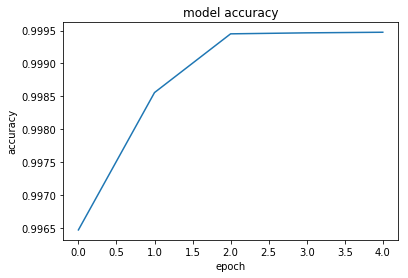

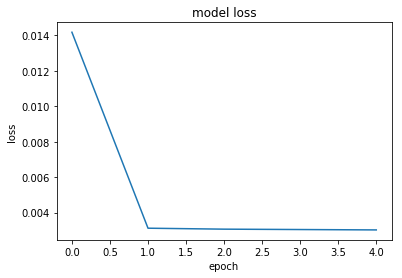

[0.99647135, 0.99855816, 0.9994505, 0.9994655, 0.9994747]


In [4]:
plot_segm_history(history)
print(history.history['accuracy'])


In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [5]:
testGene = testGenerator("data3d/test")
model = unet()
model.load_weights("unet3d.hdf5")
results = model.predict_generator(testGene,10,verbose=1)

if not os.path.exists("data3d/results"):
    os.makedirs("data3d/results")
    
saveResult("data3d/results",results)

10/10 [==============================] - 6s 587ms/step


/home/asli/anaconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:141: UserWarning: data3d/results/0_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/asli/anaconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:141: UserWarning: data3d/results/1_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/asli/anaconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:141: UserWarning: data3d/results/2_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/home/asli/anaconda3/envs/unet/lib/python3.5/site-packages/skima

In [ ]:
set(results[0].ravel())

In [ ]:
import matplotlib.pyplot as plt
import collections

In [ ]:
plt.imshow(results[0][:,:,0])

In [ ]:
results[0].shape

In [ ]:
for image in results:
    print(collections.Counter(image.ravel()))